In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import statistics
import matplotlib.pyplot as plt

# Download data from SQL

In [3]:
import sqlite3 # library for working with sqlite database
conn = sqlite3.connect("./data/MIMIC.db") # Create a connection to the on-disk database

In [4]:
pd.read_sql("SELECT * FROM sqlite_master where type='table'", conn)

,type,name,tbl_name,rootpage,sql
0,table,CHARTEVENTS,CHARTEVENTS,2,"CREATE TABLE CHARTEVENTS(\n ""ROW_ID"" TEXT,\n ..."
1,table,PROCEDUREEVENTS_MV,PROCEDUREEVENTS_MV,9120960,"CREATE TABLE ""PROCEDUREEVENTS_MV"" (\n""index"" I..."
2,table,CALLOUT,CALLOUT,9132354,"CREATE TABLE ""CALLOUT"" (\n""index"" INTEGER,\n ..."
3,table,D_CPT,D_CPT,9133903,"CREATE TABLE ""D_CPT"" (\n""index"" INTEGER,\n ""R..."
4,table,D_ITEMS,D_ITEMS,9133909,"CREATE TABLE ""D_ITEMS"" (\n""index"" INTEGER,\n ..."
5,table,CAREGIVERS,CAREGIVERS,9134171,"CREATE TABLE ""CAREGIVERS"" (\n""index"" INTEGER,\..."
6,table,MICROBIOLOGYEVENTS,MICROBIOLOGYEVENTS,9134246,"CREATE TABLE ""MICROBIOLOGYEVENTS"" (\n""index"" I..."
7,table,LABEVENTS,LABEVENTS,9153054,"CREATE TABLE ""LABEVENTS"" (\n""index"" INTEGER,\n..."
8,table,INPUTEVENTS_CV,INPUTEVENTS_CV,9708019,"CREATE TABLE ""INPUTEVENTS_CV"" (\n""index"" INTEG..."
9,table,ADMISSIONS,ADMISSIONS,10291267,"CREATE TABLE ""ADMISSIONS"" (\n""index"" INTEGER,\..."


In [5]:
admissions_df = pd.read_sql("""SELECT *
                            FROM admissions
                            """, conn)

In [6]:
admissions_df.head()

,index,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,None,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,None,CATHOLIC,MARRIED,WHITE,None,None,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1
3,3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,None,PROTESTANT QUAKER,SINGLE,WHITE,None,None,INTERIOR MYOCARDIAL INFARCTION,0,1
4,4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [10]:
admissions_df['DISCHTIME'] = pd.to_datetime(admissions_df['DISCHTIME'])
admissions_df['ADMITTIME'] = pd.to_datetime(admissions_df['ADMITTIME'])
admissions_df['length_of_stay'] = (admissions_df['DISCHTIME'] - admissions_df['ADMITTIME']).dt.days
admissions_length = admissions_df[['ADMITTIME','DISCHTIME','length_of_stay','HOSPITAL_EXPIRE_FLAG']]
is_dead = admissions_df['HOSPITAL_EXPIRE_FLAG'] == 1

In [12]:
length_alive = admissions_length[~is_dead]['length_of_stay']
length_dead = admissions_length[is_dead]['length_of_stay']
length_alive_dead = [length_alive, length_dead]

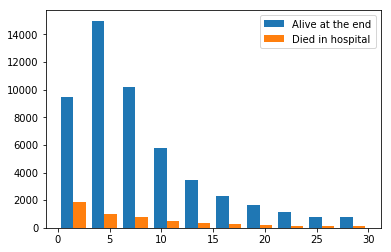

In [19]:
plt.hist(length_alive_dead, range=(0,30), histtype='bar')
plt.legend(['Alive at the end', 'Died in hospital'])

In [22]:
length_alive.describe()

count    53122.000000
mean         9.609559
std         12.279759
min         -1.000000
25%          3.000000
50%          6.000000
75%         11.000000
max        294.000000
Name: length_of_stay, dtype: float64

In [23]:
length_dead.describe()

count    5854.000000
mean        9.620772
std        13.923985
min        -1.000000
25%         1.000000
50%         5.000000
75%        12.000000
max       206.000000
Name: length_of_stay, dtype: float64